In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [136]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
# df.to_csv('results.csv', index=False)

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal 

In [137]:
df

,dataset,split_ratio,seed,AUC,AP,execution_time,best_epochs,learning_rate,regularization,neg_sample_ratio,add_false_pos_edge
0,Cora,0.1,42,0.6319,0.6475,3.51,1,0.01,0.001,1,True
1,Cora,0.1,43,0.3647,0.2179,6.40,112,0.01,0.001,1,True
2,Cora,0.1,44,0.6429,0.4806,4.96,79,0.01,0.001,1,True
3,Cora,0.1,42,0.6319,0.6475,3.16,1,0.01,0.010,1,True
4,Cora,0.1,43,0.3647,0.2179,7.11,112,0.01,0.010,1,True
...,...,...,...,...,...,...,...,...,...,...,...
127,Cora,1.0,44,0.4780,0.0009,9.39,133,0.01,10.000,1,True
128,Cora,1.0,42,0.7054,0.0016,17.03,327,0.01,100.000,1,True
129,Cora,1.0,44,0.2288,0.0006,15.93,337,0.01,100.000,1,True
130,Cora,1.0,42,0.8792,0.0039,37.98,953,0.01,1000.000,1,True


In [138]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [139]:
df_agg[df_agg['dataset'] == 'Cora'].sort_values(by=['split_ratio', 'regularization'], ascending=False)

dataset split_ratio regularization       AUC                  AP          
                                           mean       std      mean       std
47    Cora      1.0000       1000.000  0.565150  0.444134  0.002250  0.002333
46    Cora      1.0000        100.000  0.467100  0.337007  0.001100  0.000707
45    Cora      1.0000         10.000  0.670800  0.272660  0.002200  0.001838
44    Cora      1.0000          0.100  0.426000  0.268842  0.000900  0.000424
43    Cora      1.0000          0.010  0.611700  0.006505  0.001200  0.000000
42    Cora      1.0000          0.001  0.614050  0.002475  0.001200  0.000000
41    Cora      0.8750       1000.000  0.815250  0.007142  0.007000  0.002121
40    Cora      0.8750        100.000  0.720750  0.135552  0.006200  0.005233
39    Cora      0.8750         10.000  0.716750  0.137674  0.006350  0.005445
38    Cora      0.8750          0.100  0.746550  0.158321  0.006850  0.006010
37    Cora      0.8750          0.010  0.758000  0.170413  0.007750  0.007283
36    Cora      0.8750          0.001  0.759000  0.170413  0.008050  0.007707
35    Cora      0.7500       1000.000  0.300367  0.056434  0.003167  0.001350
34    Cora      0.7500        100.000  0.446733  0.071828  0.006267  0.003669
33    Cora      0.7500         10.000  0.470700  0.059777  0.021367  0.028131
32    Cora      0.7500          0.100  0.526767  0.090970  0.008800  0.006302
31    Cora      0.7500          0.010  0.594333  0.061214  0.009033  0.005400
30    Cora      0.7500          0.001  0.551167  0.064315  0.008733  0.005859
29    Cora      0.5000       1000.000  0.573500  0.167596  0.156100  0.140700
28    Cora      0.5000        100.000  0.661567  0.124478  0.272433  0.062003
27    Cora      0.5000         10.000  0.698233  0.111239  0.239100  0.052362
26    Cora      0.5000          0.100  0.731933  0.048403  0.223533  0.079896
25    Cora      0.5000          0.010  0.736733  0.046472  0.252300  0.051755
24    Cora      0.5000          0.001  0.736600  0.046612  0.237000  0.068441
23    Cora      0.3375       1000.000  0.624233  0.010141  0.153867  0.061151
22    Cora      0.3375        100.000  0.585433  0.051337  0.193700  0.026872
21    Cora      0.3375         10.000  0.640233  0.071367  0.173767  0.030605
20    Cora      0.3375          0.100  0.632533  0.075656  0.205100  0.063804
19    Cora      0.3375          0.010  0.632600  0.075786  0.204433  0.063063
18    Cora      0.3375          0.001  0.634067  0.075905  0.205667  0.062695
17    Cora      0.2250       1000.000  0.616967  0.027308  0.386800  0.185202
16    Cora      0.2250        100.000  0.678467  0.035604  0.426900  0.166709
15    Cora      0.2250         10.000  0.643100  0.119535  0.394733  0.151711
14    Cora      0.2250          0.100  0.689167  0.067757  0.419067  0.148890
13    Cora      0.2250          0.010  0.689533  0.066153  0.419433  0.149143
12    Cora      0.2250          0.001  0.691000  0.068489  0.422167  0.151919
11    Cora      0.1500       1000.000  0.684500  0.080261  0.613167  0.129243
10    Cora      0.1500        100.000  0.576100  0.035312  0.523467  0.091849
9     Cora      0.1500         10.000  0.582633  0.015734  0.532400  0.043862
8     Cora      0.1500          0.100  0.613333  0.072457  0.555367  0.025803
7     Cora      0.1500          0.010  0.617767  0.072184  0.559733  0.019350
6     Cora      0.1500          0.001  0.617167  0.072430  0.558767  0.020977
5     Cora      0.1000       1000.000  0.605933  0.106239  0.479900  0.143049
4     Cora      0.1000        100.000  0.519500  0.167571  0.415900  0.200432
3     Cora      0.1000         10.000  0.528000  0.145278  0.433000  0.193880
2     Cora      0.1000          0.100  0.541900  0.153960  0.444033  0.210249
1     Cora      0.1000          0.010  0.546500  0.157539  0.448667  0.216573
0     Cora      0.1000          0.001  0.546500  0.157539  0.448667  0.216573

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



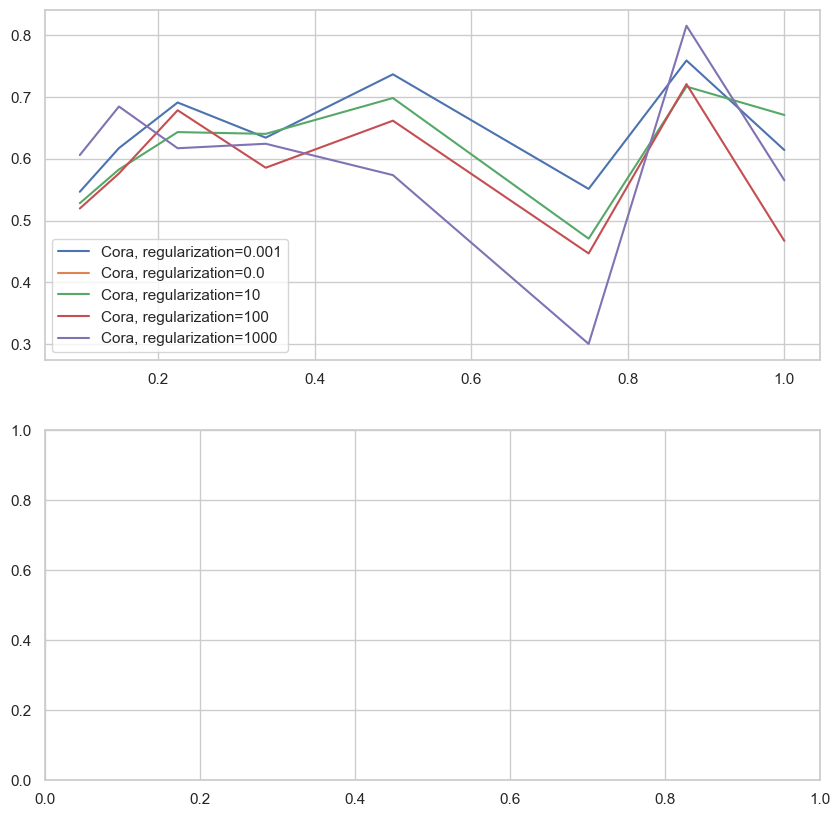

In [152]:
# plot lineplot for AUC and AP for each dataset and split_ratio
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# plot different line for different regularization
# axis 0 plot for AUC
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 0.001)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 0.001)]['AUC']['mean'], label='Cora, '
                                                                                                          'regularization=0.001')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1)]['split_ratio'], 
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1)]['AUC']['mean'], label='Cora, '
                                                                                                         'regularization=0.0')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 10)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 10)]['AUC']['mean'], label='Cora, '
                                                                                                         'regularization=10')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 100)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 100)]['AUC']['mean'], label='Cora, '
                                                                                                          'regularization=100')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1000)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1000)]['AUC']['mean'], label='Cora, '
                                                                                                           'regularization=1000')
# add legend
ax[0].legend()


In [118]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/vgae_results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df_vgae = pd.concat(data, ignore_index=True)


/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal 

In [119]:
# calculate mean and std for auc and ap group by dataset
df_vgae.groupby(['dataset']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                  AP          
              mean       std      mean       std
dataset                                         
CiteSeer  0.811667  0.009888  0.754300  0.007074
Cora      0.793267  0.007012  0.754633  0.007419
PubMed    0.841800  0.005336  0.790400  0.004814